# Analysis Via Uno

Objectives:

* Examine the sales dataset to identify trends, patterns, seasonal effects, and anomalies.
* Investigate how variables such as time, promotions, and external events impact sales.
* Build and evaluate machine learning models to accurately forecast future sales.
* Identify growth opportunities and areas for operational improvement through predictive insights.
* Generate recommendations for marketing strategies, inventory management, and resource allocation based on data-driven findings.
* Create clear, informative visualizations to effectively communicate analysis results and forecast performance.

First import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)  


In [2]:
# Load the data
data = pd.read_excel('/home/sebastian/Documents/Portfolio/Ventas via uno/EDA/principal.xlsx')
Marketplace=pd.read_excel('/home/sebastian/Documents/Portfolio/Ventas via uno/Database/principal.xlsx',sheet_name='Principal Marketplace')
TipoProducto=pd.read_excel('/home/sebastian/Documents/Portfolio/Ventas via uno/Database/principal.xlsx',sheet_name='Principal Producto')
Advertising=pd.read_excel('/home/sebastian/Documents/Portfolio/Ventas via uno/Database/LIBRO DE COMPRAS 2024.xlsx',sheet_name='BASE COMP')

# Display Datas
display(data.head())
display(Marketplace)
display(TipoProducto)


Tipo Movimiento        Tipo Documento  Número Documento Fecha de Emisión  \
0           venta  boleta electrónica t             21923       2024-01-01   
1           venta  boleta electrónica t             21924       2024-01-01   
2           venta  boleta electrónica t             21925       2024-01-01   
3           venta  boleta electrónica t             21926       2024-01-01   
4           venta  boleta electrónica t             21927       2024-01-01   

            Tracking number  Fecha y Hora Venta     Sucursal      Vendedor  \
0  659208472266bd053b66938c 2023-12-31 21:33:10  Casa Matriz  VENTA ONLINE   
1  659213862266bd053e66957b 2023-12-31 22:21:10  Casa Matriz  VENTA ONLINE   
2  659239f57e379f0505d14b6e 2024-01-01 01:05:09  Casa Matriz  VENTA ONLINE   
3  659239f9cb05a8054ae57022 2024-01-01 01:05:13  Casa Matriz  VENTA ONLINE   
4  65923dd57e379f0505d14ba0 2024-01-01 01:21:41  Casa Matriz  VENTA ONLINE   

     Cliente Nombre Cliente RUT              Cliente Email Cliente Dirección  \
0   viviana salinas  13617340-5                  Sin datos         Sin datos   
1     Silvia Psijas   6693321-0                  Sin datos         Sin datos   
2  Priscilla Bustos  16753486-4                  Sin datos         Sin datos   
3  Priscilla Bustos  16753486-4                  Sin datos         Sin datos   
4  Carolina Montiel  15663772-6  montieliglesias@gmail.com           Caren     

         Cliente Comuna Cliente Ciudad        Lista de precio  \
0  region metropolitana       Santiago  Lista de Precios Base   
1  region metropolitana       Santiago  Lista de Precios Base   
2  region metropolitana       Santiago  Lista de Precios Base   
3  region metropolitana       Santiago  Lista de Precios Base   
4  region metropolitana       Santiago  Lista de Precios Base   

    Tipo de entrega Moneda Tipo de Producto/Servicio             SKU  \
0  retiro en tienda    CLP                     Botin  12231407015007   
1  retiro en tienda    CLP                     Botin  12231407023007   
2  retiro en tienda    CLP                  Sandalia  22323605015006   
3  retiro en tienda    CLP                  Sandalia  22323605015006   
4  retiro en tienda    CLP                      Bota  12231303015008   

                 Producto/Servicio  Variante  Otros Atributos  Marca  \
0    Via Uno Botin 12231407 Marron  37 Negro              NaN    NaN   
1    Via Uno Botin 12231407 Marron        37              NaN    NaN   
2  Via Uno Sandalia 22323605 Negro        36              NaN    NaN   
3  Via Uno Sandalia 22323605 Negro        36              NaN    NaN   
4      Via Uno Bota 12231303 Negro        38              NaN    NaN   

   Detalle de Productos/Servicios Pack/Promo  Precio base  \
0                                          0        10076   
1                                          0        10076   
2                                          0        12597   
3                                          0        12597   
4                                          0        10916   

   Precio Neto Unitario  Precio Bruto Unitario  Cantidad  Subtotal Neto  \
0                 10076                  11990         1          10076   
1                 10076                  11990         1          10076   
2                 12597                  14990         1          12597   
3                 12597                  14990         1          12597   
4                 10916                  12990         1          10916   

   Subtotal Impuestos  Subtotal Bruto Nombre de dcto  Descuento Neto  \
0                1914           11990      Sin datos               0   
1                1914           11990      Sin datos               0   
2                2393           14990      Sin datos               0   
3                2393           14990      Sin datos               0   
4                2074           12990      Sin datos               0   

   Descuento Bruto  % Descuento  Costo neto unitario  Costo Total Neto  \
0

Marketplace  Cantidad  Precio Neto  Costo Total Neto   Margen  % Margen  \
0   sin datos         1      1610000                 0  1610000    100.00   
1         vpm       -35      -210721            362273   151552     71.92   
2        fcom       505     10384843          -5398327  4986516     48.02   
3       paris       111      2196473          -1156580  1039893     47.34   
4      ripley        46      1117260           -598849   518411     46.40   
5        vtex       929     15658700          -9922397  5736303     36.63   

         Tipo  
0       Venta  
1  Devolucion  
2       Venta  
3       Venta  
4       Venta  
5       Venta

Tipo de Producto/Servicio  Cantidad  Precio Neto  Costo Total Neto  \
0                  Sandalia      1285     23343698         -13126148   
1                    Zapato       103      1959537          -1123021   
2                     Botin        58      1380915           -887993   
3                 Zapatilla        76      1584939          -1041109   
4                      Bota        27       770174           -528459   
5                   Playera         1         6718             -7150   

     Margen  % Margen   Tipo  
0  10217550     43.77  Venta  
1    836516     42.69  Venta  
2    492922     35.70  Venta  
3    543830     34.31  Venta  
4    241715     31.38  Venta  
5      -432     -6.43  Venta

# Analysis Marketplace

Bar plot to see how is the profit margin

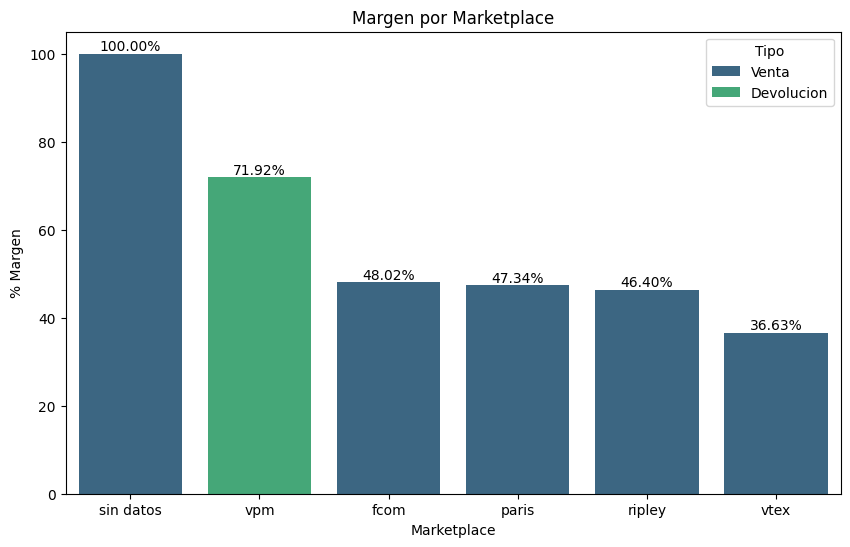

In [3]:
# Margen per Marketplace
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Marketplace', y='% Margen', data=Marketplace, palette='viridis', hue="Tipo")
containers = ax.containers


for container in containers:
    ax.bar_label(container, fmt='%.2f%%')

ax.set_title('Margen por Marketplace')
ax.set_xticklabels(ax.get_xticklabels())

plt.title('Margen por Marketplace')
plt.show()

We need to see which marketplace has the highest sells

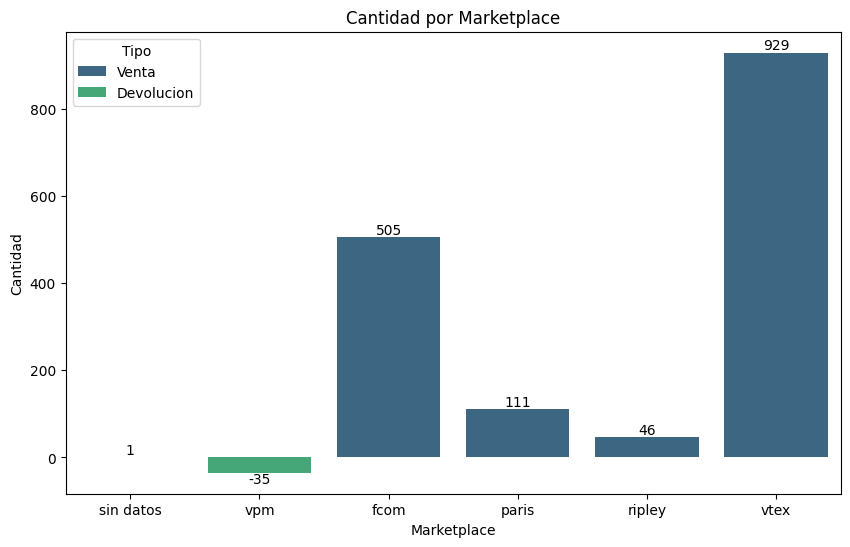

In [4]:
# Cantidad per Marketplace, for each type of product in 2 plots
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Marketplace', y='Cantidad', data=Marketplace, palette='viridis', hue="Tipo")
containers = ax.containers
for container in containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('Cantidad por Marketplace')
ax.set_xticklabels(ax.get_xticklabels())


plt.title('Cantidad por Marketplace') 
plt.show()



In [5]:
# paris, ripley and fcom will sum for Precio Neto, Costo Total Neto and rename to mkp for Marketplace (paris, ripley and fcom the sum are paris, ripley and fcom)
Marketplace = Marketplace.drop(columns=['Tipo'])
marketplaces_objetivo = ['paris', 'ripley', 'fcom']
Marketplace['Marketplace'] = Marketplace['Marketplace'].apply(lambda x: 'mkp' if x in marketplaces_objetivo else x)

Marketplace = Marketplace.groupby('Marketplace', as_index=False).agg({
    'Cantidad': 'sum',
    'Precio Neto': 'sum',
    'Costo Total Neto': 'sum',
    'Margen': 'sum'
})

# Recalculate the % Margen
Marketplace['% Margen'] = (Marketplace['Margen'] / abs(Marketplace['Precio Neto'])) * 100
Marketplace['% Margen'] = Marketplace['% Margen'].round(2)

Marketplace = Marketplace.sort_values(by='% Margen', ascending=False)


display(Marketplace)

Marketplace  Cantidad  Precio Neto  Costo Total Neto   Margen  % Margen
1   sin datos         1      1610000                 0  1610000    100.00
2         vpm       -35      -210721            362273   151552     71.92
0         mkp       662     13698576          -7153756  6544820     47.78
3        vtex       929     15658700          -9922397  5736303     36.63

We need to extract

In [6]:
Advertising.columns

Index(['Tipo Doc', 'Tipo Compra', 'C.COSTO', 'GASTO', 'RUT Proveedor',
       'Razon Social', 'Folio', 'Fecha Docto', 'Fecha Recepcion', 'PERIODO ',
       'Monto Exento', 'Monto Neto', 'Monto IVA Recuperable',
       'Monto Iva No Recuperable', 'Codigo IVA No Rec.', 'Monto Total',
       'Monto Neto Activo Fijo', 'IVA Activo Fijo', 'IVA uso Comun',
       'Impto. Sin Derecho a Credito', 'IVA No Retenido', 'Tabacos Puros',
       'Tabacos Cigarrillos', 'Tabacos Elaborados',
       'NCE o NDE sobre Fact. de Compra', 'Codigo Otro Impuesto',
       'Valor Otro Impuesto', 'Tasa Otro Impuesto', 'SII'],
      dtype='object')

In [7]:
Advertising = Advertising[Advertising['C.COSTO'] != 'CM']
Advertising = Advertising.dropna(subset=['C.COSTO'])
Advertising['C.COSTO'].unique()

array(['ONLINE', 'MKP', 'VPM', 'CVD', 't.nav'], dtype=object)

In [8]:
Advertising['GASTO'].unique()

array(['SERVICIOS E-COMMERCE', 'GASTOS INSUMOS BODEGA',
       'GASTOS DE MARKETING Y PUBLICIDAD', 'COMISIONES',
       'SERVICIOS DE DISTRIBUCION', 'COMISIONES MEDIOS DE PAGO',
       'PUBLICIDAD Y MARKETING', 'VTA', 'ALMACENAMIENTO Y LOGISTICA',
       'OTRAS COMISIONES', 'INSUMOS BODEGA',
       'GASTOS DE VIAJES Y ESTADIAS', 'SERVICIOS DE DISTRIBUCIÓN',
       'FLETES NACIONALES', 'INTERESES BANCARIOS', nan, 'OTROS GASTOS',
       'ARRIENDO'], dtype=object)

In [9]:
Advertising['GASTO']=Advertising['GASTO'].str.lower()
Advertising['GASTO']=Advertising['GASTO'].str.replace('gastos de marketing y publicidad','publicidad y marketing')
Advertising= Advertising[Advertising['GASTO'] == 'publicidad y marketing']
Advertising['GASTO'].unique()

array(['publicidad y marketing'], dtype=object)

In [10]:
# Rename the column C.COSTO to Marketplace
Advertising=Advertising.rename(columns={'C.COSTO':'Marketplace'})

# Replace the values of Marketplace
Advertising.loc[Advertising['Marketplace'] == 'ONLINE', 'Marketplace'] = 'vtex'
Advertising['Marketplace'] = Advertising['Marketplace'].str.lower()

# Group by Marketplace and GASTO
Advertising = Advertising.groupby(['Marketplace', 'GASTO'], as_index=False).agg({
    'Monto Neto': 'sum'})

Advertising = Advertising.drop(columns=['GASTO'])
Advertising = Advertising.rename(columns={'Monto Neto': 'Gasto en Publicidad'})
Advertising = Advertising.sort_values(by='Gasto en Publicidad', ascending=False)



Advertising.head()

Marketplace  Gasto en Publicidad
3        vtex           38627247.0
0         cvd           32410000.0
1         mkp            7356888.0
2         vpm             485000.0

In [11]:
# Merge Marketplace with Advertising
Marketplace = Marketplace.merge(Advertising, on='Marketplace', how='left' )

# Drop NaN values
Marketplace = Marketplace.dropna(subset=['Gasto en Publicidad']).astype({'Gasto en Publicidad': 'int64'})

# Calculate ROI (Return on Investment)
Marketplace['% ROI'] = ((Marketplace['Margen']-Marketplace['Gasto en Publicidad']) / Marketplace['Gasto en Publicidad'])* 100
Marketplace

Marketplace  Cantidad  Precio Neto  Costo Total Neto   Margen  % Margen  \
1         vpm       -35      -210721            362273   151552     71.92   
2         mkp       662     13698576          -7153756  6544820     47.78   
3        vtex       929     15658700          -9922397  5736303     36.63   

   Gasto en Publicidad      % ROI  
1               485000 -68.752165  
2              7356888 -11.038200  
3             38627247 -85.149594

Plot for Return of investment

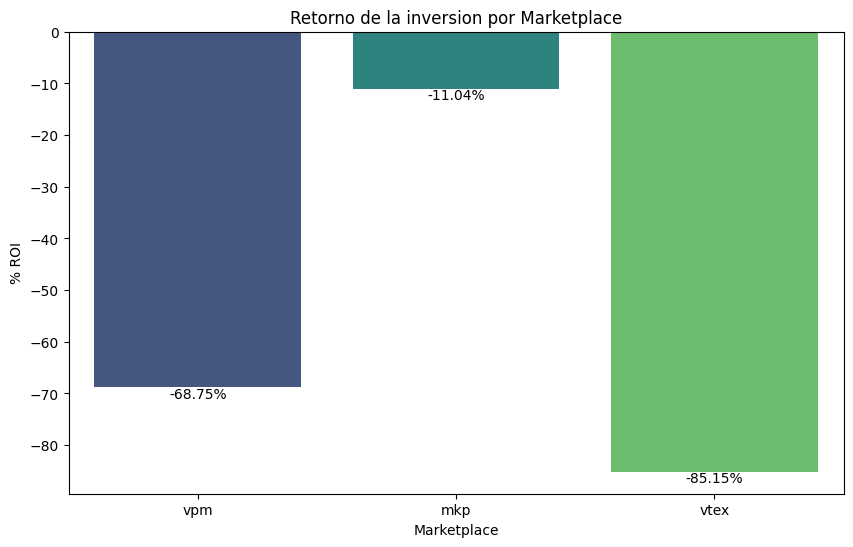

In [12]:
# Plot the ROI
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Marketplace', y='% ROI', data=Marketplace, palette='viridis')
containers = ax.containers
for container in containers:
    ax.bar_label(container, fmt='%.2f%%')

ax.set_title('Retorno de la inversion por Marketplace')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

in vpm it is too high, needs a review on advertising investment. The advertising on mkp is working very well

# Analysis Tipo de Producto / Servicio

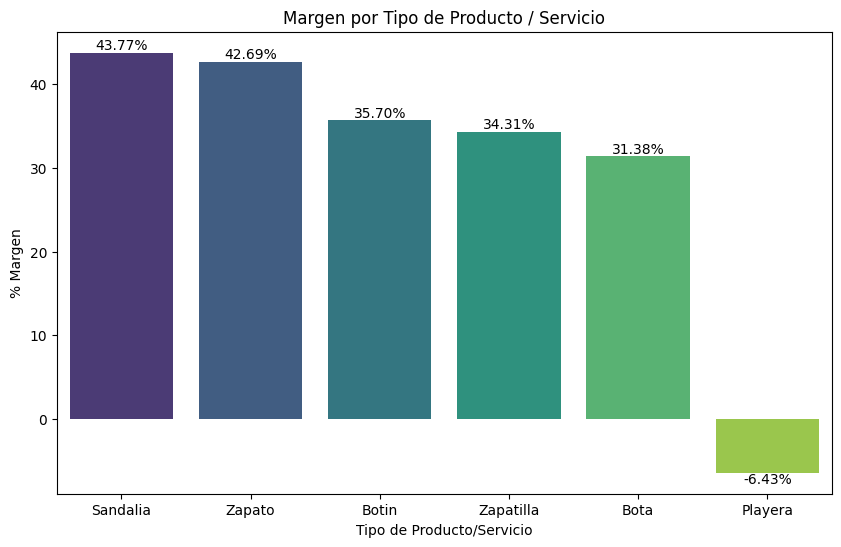

In [13]:
# Margen per TipoProducto
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Tipo de Producto/Servicio', y='% Margen', data=TipoProducto, palette='viridis')
containers = ax.containers
for container in containers:
    ax.bar_label(container, fmt='%.2f%%')

ax.set_title('Margen por Tipo de Producto / Servicio')
ax.set_xticklabels(ax.get_xticklabels())

plt.title('Margen por Tipo de Producto / Servicio')
plt.show()

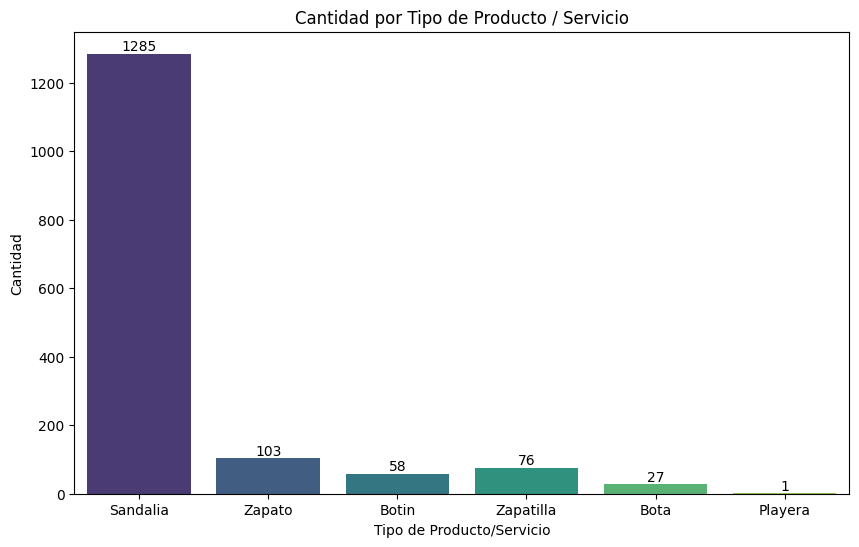

In [14]:
# Cantidad per TipoProducto
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Tipo de Producto/Servicio', y='Cantidad', data=TipoProducto, palette='viridis')
containers = ax.containers
for container in containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('Cantidad por Tipo de Producto / Servicio')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

# Data analysis

In [15]:
# No interest for Variante Despacho, envio and Sin tipo
Filter_data = data[(data['Variante'] != 'Despacho') & (data['Variante'] != 'envio') & (data['Tipo de Producto/Servicio'] != 'Sin Tipo')]

# Monthly Sales 
Filter_data['Month'] = Filter_data['Fecha y Hora Venta'].dt.month
Filter_data['Year'] = Filter_data['Fecha y Hora Venta'].dt.year

month_map = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

Filter_data['Month'] = Filter_data['Month'].map(month_map)

Filter_data.tail()

Tipo Movimiento               Tipo Documento  Número Documento  \
35433      devolucion  nota de crédito electrónica              6482   
35434      devolucion  nota de crédito electrónica              6482   
35435      devolucion  nota de crédito electrónica              6482   
35436      devolucion  nota de crédito electrónica              6482   
35437      devolucion  nota de crédito electrónica              6482   

      Fecha de Emisión Tracking number  Fecha y Hora Venta  \
35433              NaT       Sin datos 2024-12-27 19:24:03   
35434              NaT       Sin datos 2024-12-27 19:24:03   
35435              NaT       Sin datos 2024-12-27 19:24:03   
35436              NaT       Sin datos 2024-12-27 19:24:03   
35437              NaT       Sin datos 2024-12-27 19:24:03   

                 Sucursal     Vendedor                       Cliente Nombre  \
35433  SUCURSAL MAYORISTA  Maria Mella  CARCUR HERMANOS Y COMPANIA LIMITADA   
35434  SUCURSAL MAYORISTA  Maria Mella  CARCUR HERMANOS Y COMPANIA LIMITADA   
35435  SUCURSAL MAYORISTA  Maria Mella  CARCUR HERMANOS Y COMPANIA LIMITADA   
35436  SUCURSAL MAYORISTA  Maria Mella  CARCUR HERMANOS Y COMPANIA LIMITADA   
35437  SUCURSAL MAYORISTA  Maria Mella  CARCUR HERMANOS Y COMPANIA LIMITADA   

      Cliente RUT       Cliente Email Cliente Dirección Cliente Comuna  \
35433  80161100-1  carcur99@gmail.com    JOSE LEYAN 748      talagante   
35434  80161100-1  carcur99@gmail.com    JOSE LEYAN 748      talagante   
35435  80161100-1  carcur99@gmail.com    JOSE LEYAN 748      talagante   
35436  80161100-1  carcur99@gmail.com    JOSE LEYAN 748      talagante   
35437  80161100-1  carcur99@gmail.com    JOSE LEYAN 748      talagante   

      Cliente Ciudad     Lista de precio   Tipo de entrega Moneda  \
35433      TALAGANTE  Mayorista Inv 2023  retiro en tienda    CLP   
35434      TALAGANTE  Mayorista Inv 2023  retiro en tienda    CLP   
35435      TALAGANTE  Mayorista Inv 2023  retiro en tienda    CLP   
35436      TALAGANTE  Mayorista Inv 2023  retiro en tienda    CLP   
35437      TALAGANTE  Mayorista Inv 2023  retiro en tienda    CLP   

      Tipo de Producto/Servicio             SKU  \
35433                  Sandalia  22541611022006   
35434                  Sandalia  22541611022007   
35435                  Sandalia  22541611022008   
35436                  Sandalia  22541611022009   
35437                  Sandalia  22541611022010   

                     Producto/Servicio Variante  Otros Atributos  Marca  \
35433  Via Uno Sandalia 22541611 Verde       36              NaN    NaN   
35434  Via Uno Sandalia 22541611 Verde       37              NaN    NaN   
35435  Via Uno Sandalia 22541611 Verde       38              NaN    NaN   
35436  Via Uno Sandalia 22541611 Verde       39              NaN    NaN   
35437  Via Uno Sandalia 22541611 Verde       40              NaN    NaN   

       Detalle de Productos/Servicios Pack/Promo  Precio base  \
35433                                          0       -17495   
35434                                          0       -17495   
35435                                          0       -17495   
35436                                          0       -17495   
35437                                          0       -17495   

       Precio Neto Unitario  Precio Bruto Unitario  Cantidad  Subtotal Neto  \
35433                -17495                  20819        -2         -34990   
35434                -17495                  20819        -3         -52485   
35435                -17495                  20819        -3         -52485   
35436                -17495                  20819        -2         -34990   
35437                -17495                  20819        -1         -17495   

       Subtotal Impuestos  Subtotal Bruto Nombre de dcto  Descuento Neto  \
35433               -6648          -41638      Sin datos               0   
35434               -9973          -62458      Sin datos               0   
35435        

In [16]:
Filter_data_month = Filter_data[(Filter_data['Month'] == 'Abril') | (Filter_data['Month'] == 'Mayo')]
Filter_data_month.tail()

Tipo Movimiento               Tipo Documento  Número Documento  \
20852      devolucion  nota de crédito electrónica              5196   
20853      devolucion  nota de crédito electrónica              5197   
20855      devolucion  nota de crédito electrónica              5198   
20857      devolucion  nota de crédito electrónica              5199   
20859      devolucion  nota de crédito electrónica              5200   

      Fecha de Emisión Tracking number  Fecha y Hora Venta     Sucursal  \
20852              NaT       Sin datos 2024-05-30 21:00:00  Casa Matriz   
20853              NaT       Sin datos 2024-05-30 21:00:00  Casa Matriz   
20855              NaT       Sin datos 2024-05-30 21:00:00  Casa Matriz   
20857              NaT       Sin datos 2024-05-30 21:00:00  Casa Matriz   
20859              NaT       Sin datos 2024-05-30 21:00:00  Casa Matriz   

           Vendedor            Cliente Nombre Cliente RUT     Cliente Email  \
20852  VENTA ONLINE      daniela soto fuentes  14228936-9  dssoto@gmail.com   
20853  VENTA ONLINE       Alejandra Benavides  14167318-1         Sin datos   
20855  VENTA ONLINE  Carolina Fernndez Guerra  18256933-K         Sin datos   
20857  VENTA ONLINE       Maria Jose Troncoso  13953034-9         Sin datos   
20859  VENTA ONLINE            Marcela Olguin  11734815-6         Sin datos   

      Cliente Dirección        Cliente Comuna Cliente Ciudad  \
20852              STGO              santiago           STGO   
20853              STGO  region metropolitana       Santiago   
20855              STGO  region metropolitana       Santiago   
20857              STGO  region metropolitana       Santiago   
20859              STGO  region metropolitana       Santiago   

             Lista de precio   Tipo de entrega Moneda  \
20852  Lista de Precios Base  retiro en tienda    CLP   
20853  Lista de Precios Base  retiro en tienda    CLP   
20855  Lista de Precios Base  retiro en tienda    CLP   
20857  Lista de Precios Base  retiro en tienda    CLP   
20859  Lista de Precios Base  retiro en tienda    CLP   

      Tipo de Producto/Servicio             SKU  \
20852                  Sandalia  22423601022006   
20853                     Botin  12413402015006   
20855                     Botin  12432407015006   
20857                  Sandalia  22433626042006   
20859                     Botin  12442404015010   

                      Producto/Servicio Variante  Otros Atributos  Marca  \
20852   Via Uno Sandalia 22423601 Verde       36              NaN    NaN   
20853      Via Uno Botin 12413402 Negro       36              NaN    NaN   
20855      Via Uno Botin 12432407 Negro       36              NaN    NaN   
20857  Via Uno Sandalia 22433626 Morado       36              NaN    NaN   
20859      Via Uno Botin 12442404 Negro       40              NaN    NaN   

       Detalle de Productos/Servicios Pack/Promo  Precio base  \
20852                                          0       -13437   
20853                                          0       -38647   
20855                                          0       -38647   
20857                                          0       -13437   
20859                                          0       -47050   

       Precio Neto Unitario  Precio Bruto Unitario  Cantidad  Subtotal Neto  \
20852                -13437                  15990        -1         -13437   
20853                -38647                  45990        -1         -38647   
20855                -38647                  45990        -1         -38647   
20857                -13437                  15990        -1         -13437   
20859                -47050                  55990        -1         -47050   

       Subtotal Impuestos  Subtotal Bruto Nombre de dcto  Descuento Neto  \
20852               -2553          -15990      Sin datos               0   
20853               -7343          -45990      Sin datos               0   
20855               -7343          -45990      Sin datos     

## Classificate months per sales amount

In [17]:
Filter_data['Precio Neto']= Filter_data['Subtotal Bruto'] - Filter_data['Subtotal Impuestos']
monthly_sales = Filter_data.groupby('Month').agg({'Cantidad': 'sum', 'Precio Neto': 'sum','Costo Total Neto': 'sum'}).reset_index()

# Order the months
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_map.values(), ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

monthly_sales

Month  Cantidad  Precio Neto  Costo Total Neto
3        Enero      1887     29894965         -19341959
4      Febrero      1681     19582303         -17400154
7        Marzo      3840     53116895         -42593158
0        Abril      2666     58675488         -34619140
8         Mayo      2309     61744959         -33207348
6        Junio      1857     46311137         -25247478
5        Julio       839     19726063         -10840570
1       Agosto      1558     30379786         -20929028
11  Septiembre      1439     25854941         -18258416
10     Octubre      1070     20016054         -12031113
9    Noviembre      1130     24040424         -12195808
2    Diciembre      2187     43840237         -23663713

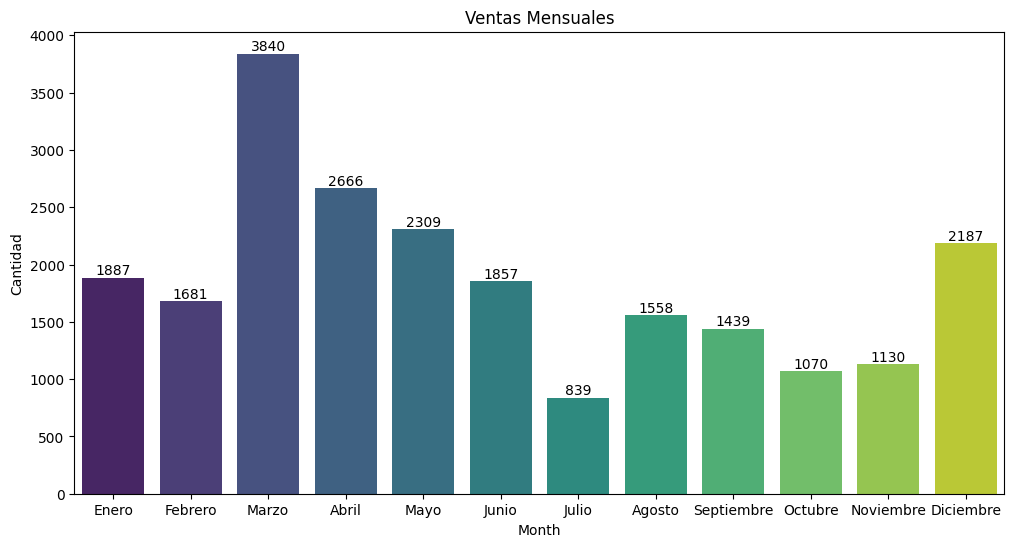

In [18]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='Month', y='Cantidad', data=monthly_sales, palette='viridis')
containers = ax.containers
for container in containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('Ventas Mensuales')
ax.set_xticklabels(ax.get_xticklabels())  
plt.show()

March has the highers sells and julio the worst sells.

# March analysis

In [19]:
 # Analyis for march
march_data = Filter_data[Filter_data['Month'] == 'Marzo']
march_data = march_data.groupby('Tipo de Producto/Servicio').agg({'Cantidad': 'sum', 'Precio Neto': 'sum','Costo Total Neto': 'sum'}).reset_index()
march_data = march_data.sort_values('Cantidad', ascending=False)
march_data.head()

Tipo de Producto/Servicio  Cantidad  Precio Neto  Costo Total Neto
3                  Sandalia      2657     25729298         -26654462
1                     Botin       707     18374584         -10207208
5                    Zapato       273      3269801          -2955972
0                      Bota       186      5674753          -2667794
2                   Playera        17        81897           -107722

In [20]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='Tipo de Producto/Servicio', y='Cantidad', data=march_data, palette='viridis')
containers = ax.containers
for container in containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('Ventas por Tipo de Producto / Servicio en Marzo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Precio Neto', data=monthly_sales, marker='o', color='blue')
plt.title('Ventas Mensuales')
plt.show()

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Cantidad', data=monthly_sales, marker='o', color='red')
plt.title('Ventas Mensuales')
plt.show()